<a href="https://colab.research.google.com/github/tooflesswulf/cyclic_quotient/blob/master/cyclic_quot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web sync copy on github:

[cyclic_quotient](https://github.com/tooflesswulf/cyclic_quotient)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def off_diag(sz, val):
  mat = np.ones((sz, sz))
  blyat = np.arange(sz)[1:]
  mat[blyat, blyat[::-1]] = val
  return mat

def prime_mat(n):
  return off_diag(n, n)

def tile(mat, n):
    return np.tile(mat, (n,n))

def diag_tile(mat_in, n):
  t1 = off_diag(n, 2) - 1
  t2 = 1 - t1
  return np.kron(t1, mat_in) + np.kron(t2, np.ones_like(mat_in))

In [3]:
prime_mat(3)

array([[1., 1., 1.],
       [1., 1., 3.],
       [1., 3., 1.]])

In [10]:
quot_8 = tile(prime_mat(2), 2) * off_diag(4, 2)

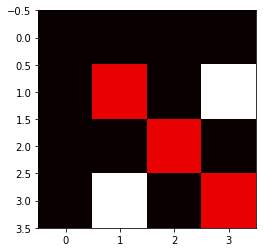

In [11]:
plt.imshow(quot_8, cmap='hot')

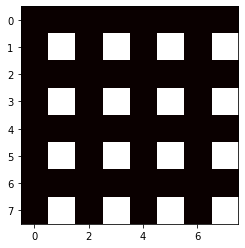

In [14]:
plt.imshow(tile(prime_mat(2), 4), cmap='hot')